### Objetivo:
Fazer uma predição dos preços dos imóveis localizados em Buenos Aires, de acordo com os dados da imobiliária Properati

</h5>O conjunto de dados contém informações sobre todos os imóveis georreferenciados do banco de dados da empresa.<br> 
A informação de cada propriedade que inclui é a seguinte:</h5>

    Scheme : "Real_State_Properati.csv"
    property_type : Type of property (House, Apartment, PH).
    place_name : Name of the development.
    country_name : Country in which the ad is published.
    state_name: Fields referring to the location of the property.
    lat : Latitude
    lon : Longitude
    price : Price published in the ad.
    currency : Currency of the published price.
    surface_total_in_m2 : Total area in m².

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



In [2]:
dados = pd.read_csv('Real_State_Properati.csv', sep='\t')
dados.head()

,property_type,place_name,country_name,state_name,lat,lon,price,currency,surface_total_in_m2
0,PH,Mataderos,Argentina,Capital Federal,-34.661824,-58.508839,62000.0,USD,55.0
1,apartment,Mataderos,Argentina,Capital Federal,-34.652262,-58.522982,72000.0,USD,55.0
2,apartment,Belgrano,Argentina,Capital Federal,-34.559873,-58.443362,138000.0,USD,45.0
3,apartment,Belgrano,Argentina,Capital Federal,-34.559873,-58.443362,195000.0,USD,65.0
4,PH,Mataderos,Argentina,Capital Federal,-34.652356,-58.501624,239000.0,USD,140.0


In [3]:
dados.property_type.unique()

array(['PH', 'apartment', 'house', 'store'], dtype=object)

In [4]:
print(dados.currency.unique())
print(dados.country_name.unique())
print(dados.state_name.unique())
print(dados.property_type.unique())
print(dados.place_name.unique())

['USD' 'ARS']
['Argentina']
['Capital Federal']
['PH' 'apartment' 'house' 'store']
['Mataderos' 'Belgrano' 'Palermo' 'Flores' 'Boedo' 'Las Cañitas'
 'Puerto Madero' 'Balvanera' 'Caballito' 'Nuñez' 'Floresta' 'Barracas'
 'Recoleta' 'Congreso' 'Villa Crespo' 'Chacarita' 'Almagro' 'Constitución'
 'Colegiales' 'Villa Urquiza' 'Barrio Norte' 'Palermo Hollywood'
 'Saavedra' 'Paternal' 'Agronomía' 'Villa Pueyrredón' 'Coghlan'
 'Parque Centenario' 'San Telmo' 'Monserrat' 'Boca' 'Parque Avellaneda'
 'San Cristobal' 'Abasto' 'Versalles' 'Villa del Parque' 'Monte Castro'
 'Retiro' 'Capital Federal' 'Parque Chas' 'Palermo Chico' 'Villa Devoto'
 'Palermo Soho' 'Centro / Microcentro' 'Liniers' 'Tribunales' 'Once'
 'San Nicolás' 'Parque Chacabuco' 'Velez Sarsfield' 'Catalinas' 'Pompeya'
 'Parque Patricios' 'Palermo Viejo' 'Villa Lugano' 'Villa Luro'
 'Villa General Mitre' 'Villa Ortuzar' 'Villa Santa Rita' 'Villa Soldati'
 'Villa Real' 'Villa Riachuelo']


In [5]:
dados.dtypes

property_type           object
place_name              object
country_name            object
state_name              object
lat                    float64
lon                    float64
price                  float64
currency                object
surface_total_in_m2    float64
dtype: object

In [6]:
dados.isnull().sum()

property_type          0
place_name             0
country_name           0
state_name             0
lat                    0
lon                    0
price                  0
currency               0
surface_total_in_m2    0
dtype: int64

In [7]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17223 entries, 0 to 17222
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        17223 non-null  object 
 1   place_name           17223 non-null  object 
 2   country_name         17223 non-null  object 
 3   state_name           17223 non-null  object 
 4   lat                  17223 non-null  float64
 5   lon                  17223 non-null  float64
 6   price                17223 non-null  float64
 7   currency             17223 non-null  object 
 8   surface_total_in_m2  17223 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.2+ MB


In [8]:
#traduzindo o nome das colunas
dados.columns = ['tipo_propiedade', 'bairro', 'pais', 'estado', 'latitude', 'longitude', 'preco', 'moeda', 'area_total_em_m2']

In [9]:
#quantidade de cada moeda
dados.moeda.value_counts()

USD    16700
ARS      523
Name: moeda, dtype: int64

In [10]:
#transformando o peso em dolar
#cotação dia 11/05/2022

dolar = {'USD': 1, 'ARS': 0.0085}
dados['preco_dolar'] = dados.moeda.map(dolar)*dados.preco
dados.head()

,tipo_propiedade,bairro,pais,estado,latitude,longitude,preco,moeda,area_total_em_m2,preco_dolar
0,PH,Mataderos,Argentina,Capital Federal,-34.661824,-58.508839,62000.0,USD,55.0,62000.0
1,apartment,Mataderos,Argentina,Capital Federal,-34.652262,-58.522982,72000.0,USD,55.0,72000.0
2,apartment,Belgrano,Argentina,Capital Federal,-34.559873,-58.443362,138000.0,USD,45.0,138000.0
3,apartment,Belgrano,Argentina,Capital Federal,-34.559873,-58.443362,195000.0,USD,65.0,195000.0
4,PH,Mataderos,Argentina,Capital Federal,-34.652356,-58.501624,239000.0,USD,140.0,239000.0


In [11]:
#conferindo se houve a alteração dos preços do peso para o dolar
dados[dados.moeda == 'ARS']

,tipo_propiedade,bairro,pais,estado,latitude,longitude,preco,moeda,area_total_em_m2,preco_dolar
58,apartment,Paternal,Argentina,Capital Federal,-34.603594,-58.465425,1099350.0,ARS,27.0,9344.4750
59,apartment,Paternal,Argentina,Capital Federal,-34.603594,-58.465425,1113420.0,ARS,27.0,9464.0700
60,apartment,Paternal,Argentina,Capital Federal,-34.603594,-58.465425,1127700.0,ARS,27.0,9585.4500
61,apartment,Paternal,Argentina,Capital Federal,-34.603594,-58.465425,1141980.0,ARS,27.0,9706.8300
62,apartment,Paternal,Argentina,Capital Federal,-34.603594,-58.465425,1327515.0,ARS,32.0,11283.8775
...,...,...,...,...,...,...,...,...,...,...
16977,apartment,Villa Urquiza,Argentina,Capital Federal,-34.573427,-58.473572,2337233.0,ARS,45.0,19866.4805
17021,apartment,Belgrano,Argentina,Capital Federal,-34.564408,-58.437251,650000.0,ARS,132.0,5525.0000
17113,apartment,Villa Crespo,Argentina,Capital Federal,-34.597679,-58.443019,2960000.0,ARS,53.0,25160.0000
17165,apartment,Coghlan,Argentina,Capital Federal,-34.558708,-58.486731,2651200.0,ARS,70.0,22535.2000


In [12]:
dados.shape

(17223, 10)

In [13]:
dados['preco_m2'] = round(dados['preco_dolar'] / dados['area_total_em_m2'],2)

In [14]:
#apagando as colunas que não serão mais utilizadas
#df.drop(['column_nameA', 'column_nameB'], axis=1, inplace=True)
dados.drop(['pais', 'estado', 'preco', 'moeda'], axis =1, inplace=True)

In [15]:
dados.head()

,tipo_propiedade,bairro,latitude,longitude,area_total_em_m2,preco_dolar,preco_m2
0,PH,Mataderos,-34.661824,-58.508839,55.0,62000.0,1127.27
1,apartment,Mataderos,-34.652262,-58.522982,55.0,72000.0,1309.09
2,apartment,Belgrano,-34.559873,-58.443362,45.0,138000.0,3066.67
3,apartment,Belgrano,-34.559873,-58.443362,65.0,195000.0,3000.00
4,PH,Mataderos,-34.652356,-58.501624,140.0,239000.0,1707.14


In [16]:
#analisando a coluna area_total_em_m2 
print(dados.area_total_em_m2.min())

0.0


In [17]:
area_0  = dados[dados.area_total_em_m2 == 0]
area_0

,tipo_propiedade,bairro,latitude,longitude,area_total_em_m2,preco_dolar,preco_m2
2486,apartment,Palermo Soho,-34.589974,-58.425614,0.0,780000.0,inf
4872,apartment,Recoleta,-34.588818,-58.390648,0.0,320000.0,inf
5454,apartment,Caballito,-34.617348,-58.449404,0.0,68500.0,inf
6318,apartment,Palermo Hollywood,-34.582558,-58.432585,0.0,175000.0,inf
7170,apartment,Barracas,-34.641131,-58.369122,0.0,135000.0,inf
15888,apartment,Barrio Norte,-34.598727,-58.395851,0.0,112000.0,inf


In [18]:
#excluindo a área = 0
dados = dados.drop(index = area_0.index)

In [19]:
#dados para visualizar o boxplots
df = dados.drop(['tipo_propiedade','bairro','latitude','longitude'], axis = 1)
df

,area_total_em_m2,preco_dolar,preco_m2
0,55.0,62000.0,1127.27
1,55.0,72000.0,1309.09
2,45.0,138000.0,3066.67
3,65.0,195000.0,3000.00
4,140.0,239000.0,1707.14
...,...,...,...
17218,91.0,165000.0,1813.19
17219,44.0,165000.0,3750.00
17220,157.0,410000.0,2611.46
17221,157.0,410000.0,2611.46


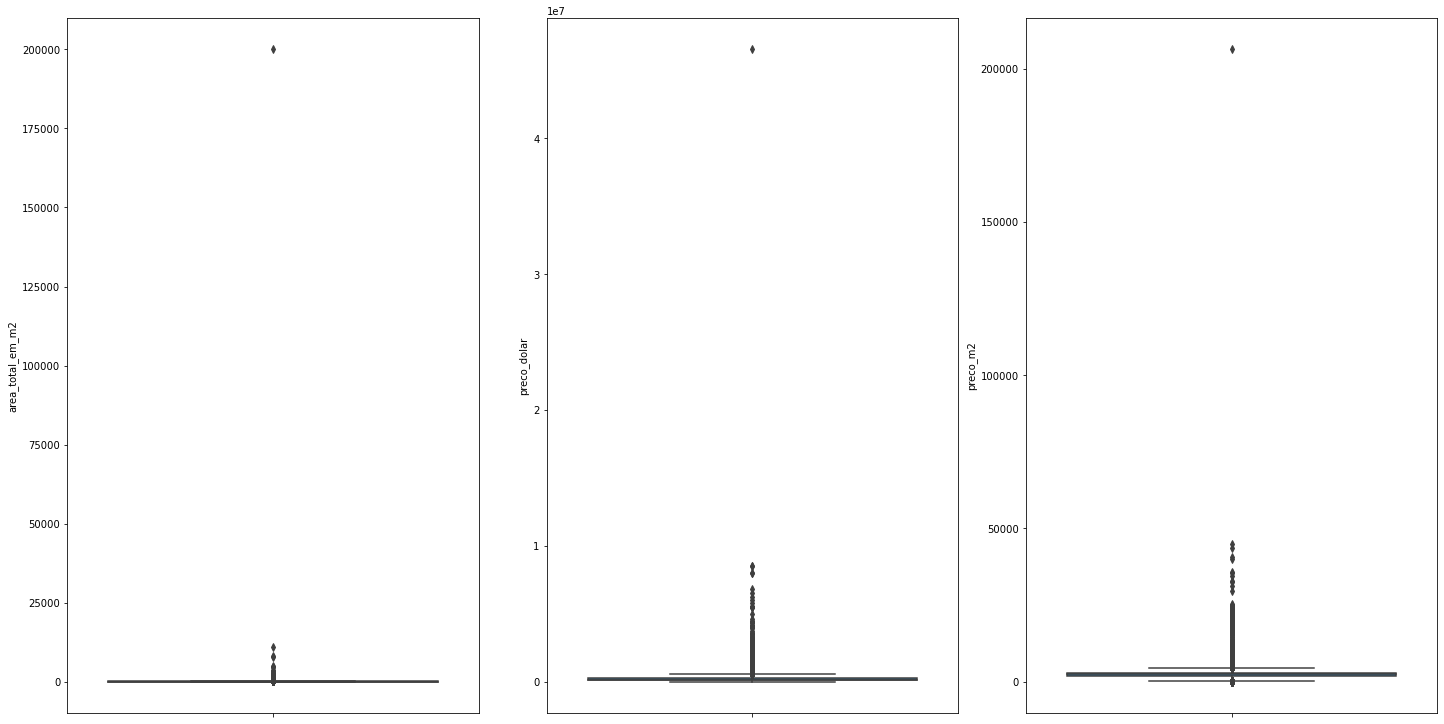

In [20]:
#verificando os outliers


fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(20,10))
count = 0
axs = axs.flatten()
for tar, var in df.items():
    sns.boxplot(y=tar, data = df, ax = axs[count])
    count = count + 1
plt.tight_layout(pad=0.5, w_pad=0.78, h_pad=4.0)

In [21]:
#visualizando o percentual de outliers por coluna

for tar, var in df.items():
    q1 = var.quantile(0.25)
    q3 = var.quantile(0.75)
    iqr = q3 - q1
    var_col = var[(var<=q1-1.5*iqr) | (var>=q3+1.5*iqr)]
    perc = np.shape(var_col)[0]*100/np.shape(df)[0]
    print('Coluna {}: percentual de outliers: {:.3}%'.format(tar, perc))

Coluna area_total_em_m2: percentual de outliers: 8.93%
Coluna preco_dolar: percentual de outliers: 10.0%
Coluna preco_m2: percentual de outliers: 6.88%


C:\Users\p_net\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\p_net\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\p_net\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

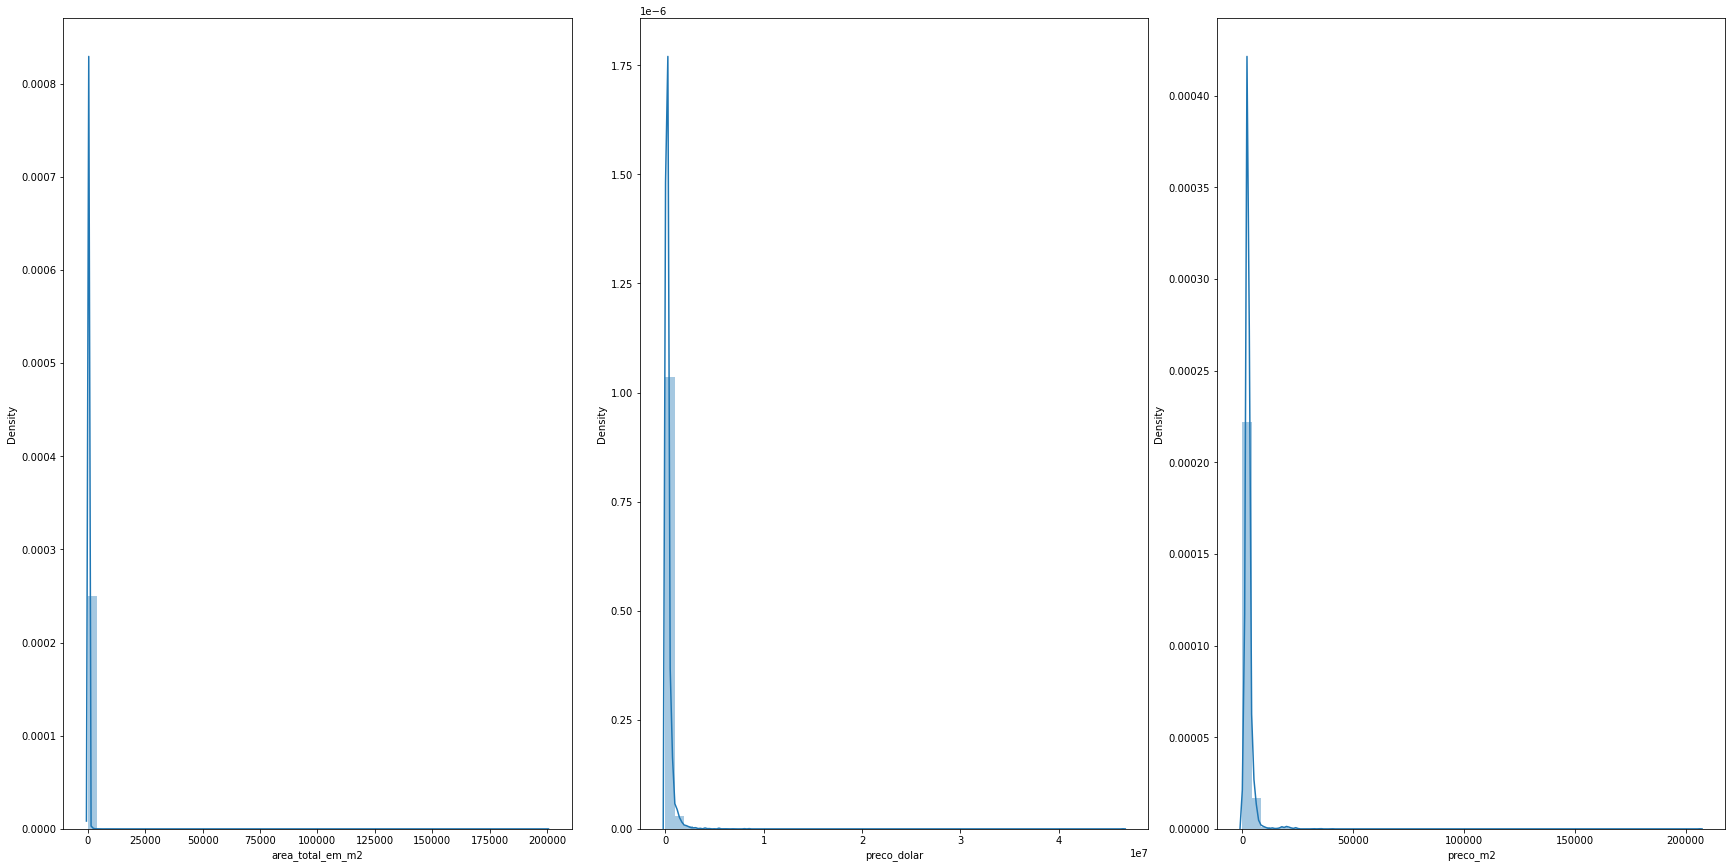

In [22]:
#distribuição dos dados
fig,axs = plt.subplots(ncols=3, nrows=1, figsize=(24,12))
count = 0
axs = axs.flatten()
for tar,var in df.items():
    sns.distplot(var,ax=axs[count])
    count = count+1
plt.tight_layout(pad=0.5, w_pad=0.6, h_pad=5.0)

In [23]:
#função para definir os limites dos outliers
def limites(coluna):
    q1 = coluna.quantile(0.25)
    q3 = coluna.quantile(0.75)
    amplitude = q3 - q1
    return q1 - 1.5 * amplitude, q3 + 1.5 * amplitude

In [24]:
#tratamento de outliers

def excluir_outliers(df, nome_coluna):
    qtde_linhas = df.shape[0]
    lim_inf, lim_sup = limites(df[nome_coluna])
    df = df.loc[(df[nome_coluna] >= lim_inf) & (df[nome_coluna] <= lim_sup), :]
    linhas_removidas = qtde_linhas - df.shape[0]
    return df, linhas_removidas


In [25]:
dados, linhas_removidas = excluir_outliers(dados, 'preco_dolar')
print('{} linhas removidas'.format(linhas_removidas))

1728 linhas removidas


In [26]:
dados, linhas_removidas = excluir_outliers(dados, 'area_total_em_m2')
print('{} linhas removidas'.format(linhas_removidas))

1155 linhas removidas


In [27]:
dados, linhas_removidas = excluir_outliers(dados, 'preco_m2')
print('{} linhas removidas'.format(linhas_removidas))

1012 linhas removidas


In [28]:
df = dados.drop(['tipo_propiedade','bairro','latitude','longitude'], axis = 1)
df.shape

(13322, 3)

C:\Users\p_net\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\p_net\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\p_net\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

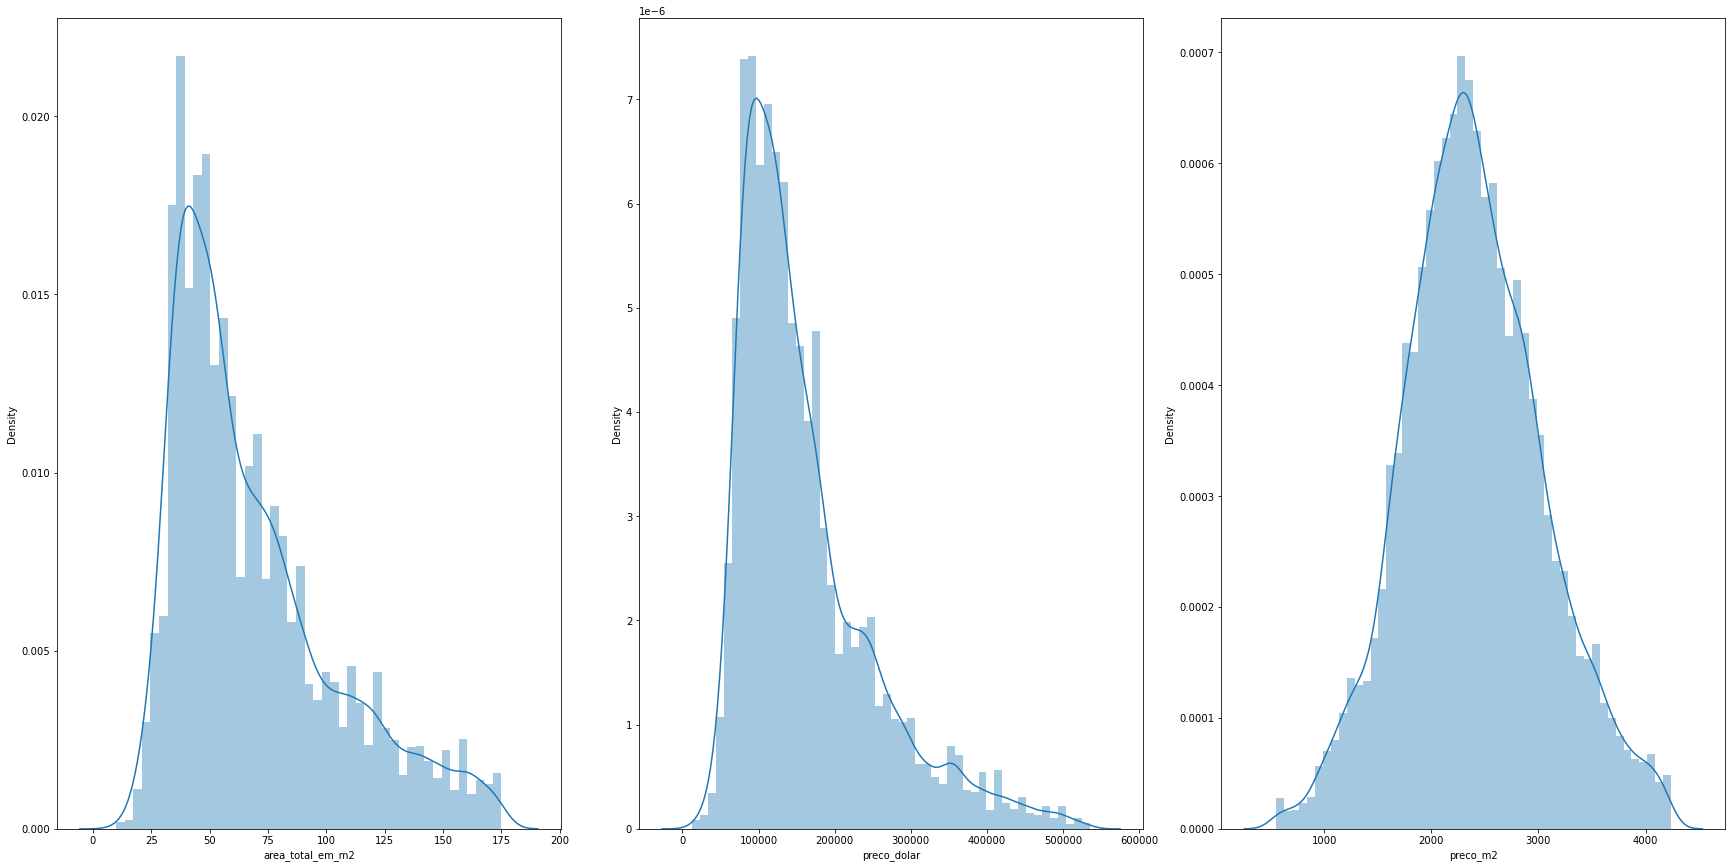

In [29]:
#distribuição dos dados
fig,axs = plt.subplots(ncols=3, nrows=1, figsize=(24,12))
count = 0
axs = axs.flatten()
for tar,var in df.items():
    sns.distplot(var,ax=axs[count])
    count = count+1
plt.tight_layout(pad=0.5, w_pad=0.6, h_pad=5.0)

In [30]:
#removendo a coluna bairros
dados = dados.drop(['bairro'], axis = 1)


In [31]:
#correlação entre as colunas
print(dados.corr())

                  latitude  longitude  area_total_em_m2  preco_dolar  preco_m2
latitude          1.000000   0.545907         -0.000145     0.156768  0.290622
longitude         0.545907   1.000000          0.004121     0.052650  0.073987
area_total_em_m2 -0.000145   0.004121          1.000000     0.795760 -0.193282
preco_dolar       0.156768   0.052650          0.795760     1.000000  0.375532
preco_m2          0.290622   0.073987         -0.193282     0.375532  1.000000


<AxesSubplot:>

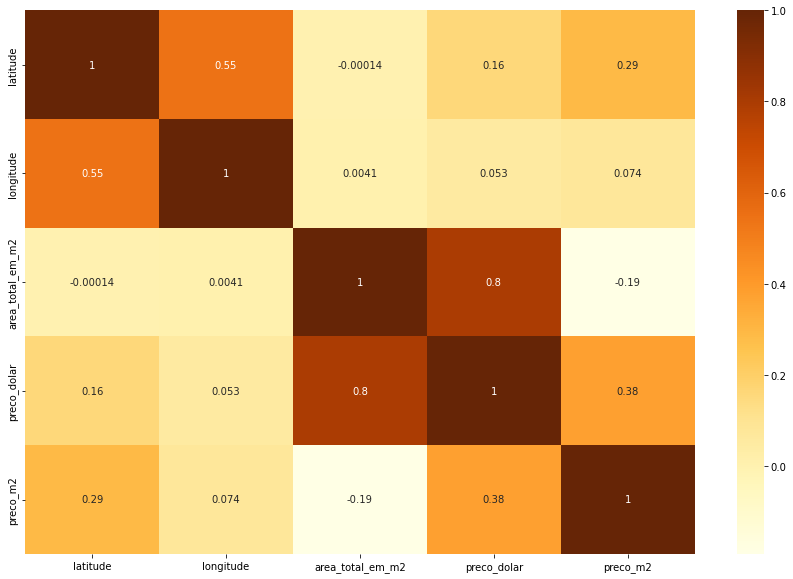

In [32]:
#heatmap
plt.figure(figsize=(15,10))
sns.heatmap(dados.corr(), annot = True, cmap ='YlOrBr')

In [33]:
#utilizando a função do pandas get dummies
dados = pd.get_dummies(data=dados, columns = ['tipo_propiedade'])
dados

,latitude,longitude,area_total_em_m2,preco_dolar,preco_m2,tipo_propiedade_PH,tipo_propiedade_apartment,tipo_propiedade_house,tipo_propiedade_store
0,-34.661824,-58.508839,55.0,62000.0,1127.27,1,0,0,0
1,-34.652262,-58.522982,55.0,72000.0,1309.09,0,1,0,0
2,-34.559873,-58.443362,45.0,138000.0,3066.67,0,1,0,0
3,-34.559873,-58.443362,65.0,195000.0,3000.00,0,1,0,0
4,-34.652356,-58.501624,140.0,239000.0,1707.14,1,0,0,0
...,...,...,...,...,...,...,...,...,...
17218,-34.599214,-58.402519,91.0,165000.0,1813.19,0,1,0,0
17219,-34.587425,-58.397372,44.0,165000.0,3750.00,0,1,0,0
17220,-34.563685,-58.442683,157.0,410000.0,2611.46,0,1,0,0
17221,-34.563685,-58.442683,157.0,410000.0,2611.46,0,1,0,0


### Dividindo o modelo em treino e teste

In [34]:
X = dados.drop(['preco_m2'], axis = 1)
y = dados.preco_m2

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


### Regressão Linear

In [36]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression(normalize=True)

reg.fit(X_train, y_train)

C:\Users\p_net\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [37]:
#valor do intercept
reg.intercept_

-2.336522388081047e+16

In [38]:
#convertendo os coeficientes em um DataFrame
coeficiente = pd.DataFrame([X_train.columns, reg.coef_]).T
coeficiente = coeficiente.rename(columns={0: 'Atributo', 1:'Coeficiente'})
coeficiente

,Atributo,Coeficiente
0,latitude,1304.926532
1,longitude,-497.333284
2,area_total_em_m2,-25.173814
3,preco_dolar,0.010546
4,tipo_propiedade_PH,23365223880829056.0
5,tipo_propiedade_apartment,23365223880828988.0
6,tipo_propiedade_house,23365223880829172.0
7,tipo_propiedade_store,23365223880829024.0


In [39]:
#valor previsto
y_pred = reg.predict(X_train)



In [40]:
from sklearn import metrics 

print('Modelo Regressão Linear Treino')


print('R²: {:.2%}'.format(metrics.r2_score(y_train, y_pred)))

print('RMSE: {:.4}'.format(np.sqrt(metrics.mean_squared_error(y_train, y_pred))))

Modelo Regressão Linear Treino
R²: 80.84%
RMSE: 286.5


C:\Users\p_net\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\p_net\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normalidade e distribuição dos erros')

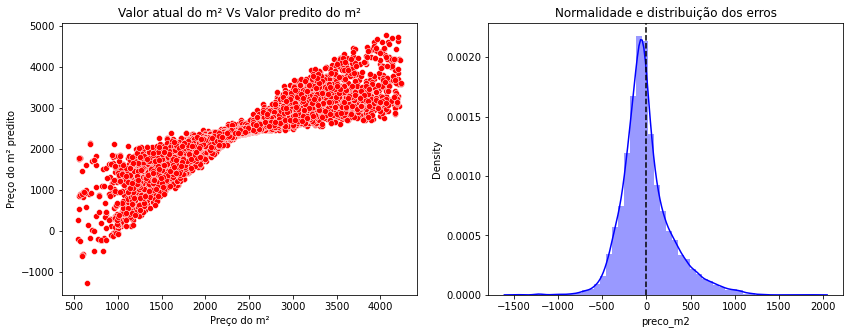

In [41]:
#Visualizar os valores e os preditos
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y_train,y_pred,ax=ax,color='r')
plt.xlabel("Preço do m²")
plt.ylabel("Preço do m² predito")
ax.set_title('Valor atual do m² Vs Valor predito do m²')

# normalidade dos erros
ax = f.add_subplot(122)
a=(y_train - y_pred)
sns.distplot(a,ax=ax,color='b')
ax.axvline(a.mean(),color='k',linestyle='--')
ax.set_title('Normalidade e distribuição dos erros')

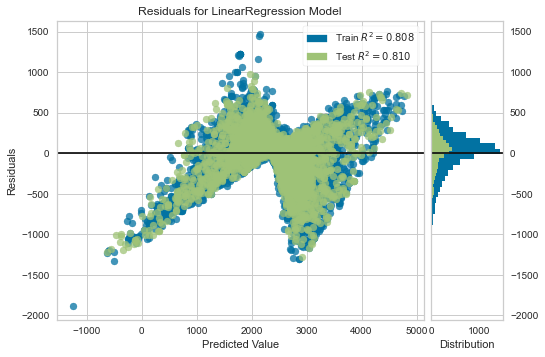

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [42]:
from yellowbrick.regressor import ResidualsPlot


modelo = LinearRegression()
visualizar = ResidualsPlot(modelo)

visualizar.fit(X_train, y_train)  
visualizar.score(X_test, y_test)  
visualizar.show()

### Multicolinearidade


Multicolinearidade em regressão é uma condição que ocorre quando algumas variáveis preditoras no modelo estão correlacionadas a outras variáveis preditoras. A multicolinearidade forte é problemática porque pode aumentar a variância dos coeficientes de regressão, tornando-os instáveis.

Uma maneira de medir a multicolinearidade é o fator de inflação da variância (VIF), que avalia o quanto a variância de um coeficiente de regressão estimado aumenta se as suas preditoras estiverem correlacionadas. Se nenhum fator estiver correlacionado, os VIFs serão todos 1

In [43]:
R2 = reg.score(X_test, y_test)
VIF_reg = 1 / (1-R2)
VIF_reg

5.276254031146204

In [44]:
#Predição do teste
y_tpred= reg.predict(X_test)
tpred_reg = metrics.r2_score(y_test, y_tpred)

print('Modelo Regressão Linear Teste')

print('R²: {:.2%}'.format(tpred_reg))

print('RMSE: {:.4}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_tpred))))

Modelo Regressão Linear Teste
R²: 81.05%
RMSE: 280.9


### XGBoost Regressor

In [45]:
from xgboost import XGBRegressor

xgbr = XGBRegressor()

xgbr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [46]:
#predição no treino
y_pred=xgbr.predict(X_train)

In [47]:
print('Modelo XGBoost Treino')
print('R²: {:.2%}'.format(metrics.r2_score(y_train, y_pred)))

print('RMSE: {:.4}'.format(np.sqrt(metrics.mean_squared_error(y_train, y_pred))))

Modelo XGBoost Treino
R²: 99.67%
RMSE: 37.34


C:\Users\p_net\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\p_net\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normalidade e distribuição dos erros')

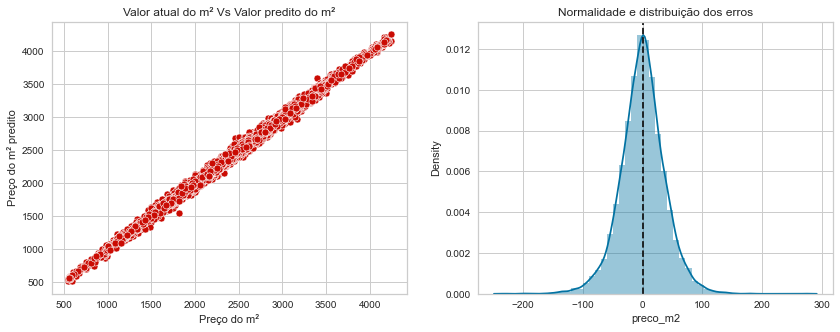

In [48]:
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y_train,y_pred,ax=ax,color='r')
plt.xlabel("Preço do m²")
plt.ylabel("Preço do m² predito")
ax.set_title('Valor atual do m² Vs Valor predito do m²')

# normalidade dos erros
ax = f.add_subplot(122)
a=(y_train - y_pred)
sns.distplot(a,ax=ax,color='b')
ax.axvline(a.mean(),color='k',linestyle='--')
ax.set_title('Normalidade e distribuição dos erros')

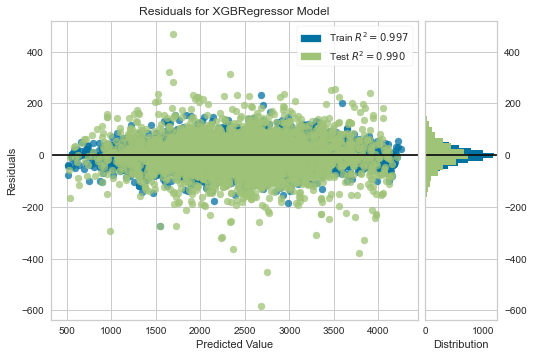

<AxesSubplot:title={'center':'Residuals for XGBRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [49]:
modelo = XGBRegressor()
visualizar = ResidualsPlot(modelo)

visualizar.fit(X_train, y_train)  
visualizar.score(X_test, y_test)  
visualizar.show()

In [50]:
#Multicolinearidade
R2 = xgbr.score(X_test, y_test)
VIF_xgbr = 1 / (1-R2)
VIF_xgbr

97.64624849584229

XGBRegressor é um modelo com uma alta colinearidade

In [51]:
#Predição do teste
y_tpred= xgbr.predict(X_test)
tpred_xgbr = metrics.r2_score(y_test, y_tpred)

print('Modelo XGBoost Teste')

print('R²: {:.2%}'.format(tpred_xgbr))

print('RMSE: {:.4}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_tpred))))

Modelo XGBoost Teste
R²: 98.98%
RMSE: 65.29


### Random Forest

In [52]:
from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor()

rfr.fit(X_train,y_train)

RandomForestRegressor()

In [53]:
#predição no treino
y_pred=rfr.predict(X_train)

In [54]:
print('Modelo Random Forest Treino')

print('R²: {:.2%}'.format(metrics.r2_score(y_train, y_pred)))

print('RMSE: {:.4}'.format(np.sqrt(metrics.mean_squared_error(y_train, y_pred))))

Modelo Random Forest Treino
R²: 99.82%
RMSE: 28.1


C:\Users\p_net\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\p_net\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normalidade e distribuição dos erros')

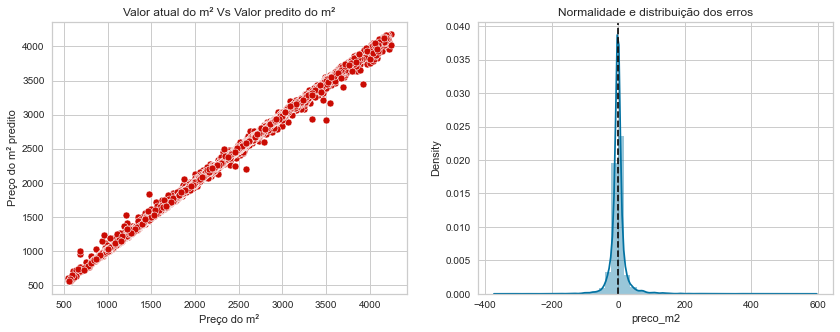

In [55]:
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y_train,y_pred,ax=ax,color='r')
plt.xlabel("Preço do m²")
plt.ylabel("Preço do m² predito")
ax.set_title('Valor atual do m² Vs Valor predito do m²')

# normalidade dos erros
ax = f.add_subplot(122)
a=(y_train - y_pred)
sns.distplot(a,ax=ax,color='b')
ax.axvline(a.mean(),color='k',linestyle='--')
ax.set_title('Normalidade e distribuição dos erros')

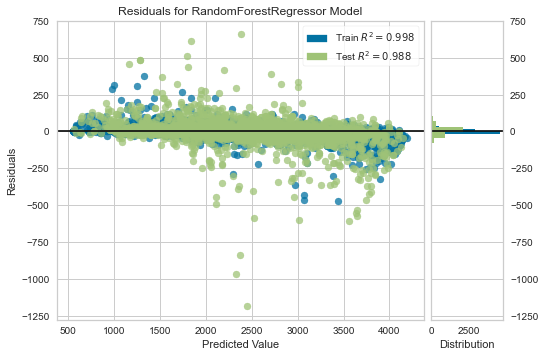

<AxesSubplot:title={'center':'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [56]:
modelo = RandomForestRegressor()
visualizar = ResidualsPlot(modelo)


visualizar.fit(X_train, y_train)  
visualizar.score(X_test, y_test)  
visualizar.show()

In [57]:
#Multicolinearidade
R2 = rfr.score(X_test, y_test)
VIF_rfr = 1 / (1-R2)
VIF_rfr

81.2620727840576

In [58]:
#Predição do teste
y_tpred= rfr.predict(X_test)
tpred_rfr = metrics.r2_score(y_test, y_tpred)

print('Modelo Random Forest Teste')


print('R²: {:.2%}'.format(tpred_rfr))

print('RMSE: {:.4}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_tpred))))

Modelo Random Forest Teste
R²: 98.77%
RMSE: 71.57


### Comparação dos resultados

In [59]:
modelo = pd.DataFrame({'Modelo': ['Regressão Linear', 'XGBoost', 'Random Forest'],
                      'R²': [tpred_reg*100, tpred_xgbr*100, tpred_rfr*100]})
modelo.sort_values(by='R²', ascending = False)

,Modelo,R²
1,XGBoost,98.975895
2,Random Forest,98.769414
0,Regressão Linear,81.047160
